In [20]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.io as scio
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import sklearn.metrics as metrics

In [21]:
import os
os.chdir('/root/autodl-tmp/CroSP')

In [22]:
from model.util import mclust_R

In [23]:
data_name = 'MSC'

In [24]:
dataset_name = 'osmFISH'

In [25]:
input_dir = os.path.join('./Results','Data',dataset_name,data_name)
output_dir = os.path.join('./Results', 'Figure',dataset_name,data_name)
adata = sc.read(os.path.join(input_dir,data_name+'_raw.h5ad'))
adata.var_names_make_unique()
os.makedirs(output_dir, exist_ok=True)

In [28]:
adata

AnnData object with n_obs × n_vars = 4839 × 33
    obs: 'ClusterID', 'ClusterName', 'Region', 'Valid'
    var: 'Fluorophore', 'Hybridization', 'n_cells'
    uns: 'log1p'
    obsm: 'spatial'

#adata of train over 

In [29]:
adata = sc.read(os.path.join(input_dir,data_name+'_result_raw.h5ad'))

In [30]:
adata

AnnData object with n_obs × n_vars = 4839 × 33
    obs: 'ClusterID', 'ClusterName', 'Region', 'Valid', 'mclust'
    var: 'Fluorophore', 'Hybridization', 'n_cells'
    uns: 'log1p'
    obsm: 'CroSP', 'spatial'

In [31]:
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/root/miniconda3/envs/deepst_env/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [32]:
adata

AnnData object with n_obs × n_vars = 4839 × 33
    obs: 'ClusterID', 'ClusterName', 'Region', 'Valid', 'mclust'
    var: 'Fluorophore', 'Hybridization', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'log1p', 'hvg'
    obsm: 'CroSP', 'spatial'

In [33]:
sc.pp.neighbors(adata, use_rep='CroSP')
sc.tl.umap(adata)

/root/miniconda3/envs/deepst_env/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/root/miniconda3/envs/deepst_env/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/root/miniconda3/envs/deepst_env/lib/python3.9/site-packages/umap/distances.

In [35]:
%matplotlib inline

/root/miniconda3/envs/deepst_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'CroSP'}, xlabel='UMAP1', ylabel='UMAP2'>

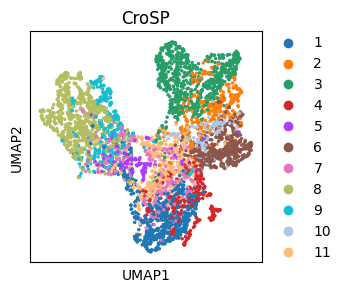

In [37]:
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.umap(adata, color='mclust',title='CroSP',  show=False)
# plt.axis('off')
# plt.savefig(os.path.join(output_dir, f'pred_domain_umap.svg'), bbox_inches='tight', dpi=300)

In [38]:
obs_df = adata.obs.dropna()
ARI = metrics.adjusted_rand_score(obs_df['mclust'], obs_df['Region'])
AMI = metrics.adjusted_mutual_info_score(obs_df['mclust'], obs_df['Region'])
NMI = metrics.normalized_mutual_info_score(obs_df['mclust'], obs_df['Region'])
HC =  metrics.homogeneity_score(obs_df['mclust'], obs_df['Region'])
print('ARI = %.4f' %ARI)
print('AMI = %.4f' %AMI)
print('NMI = %.4f' %NMI)
print('HC = %.4f' %HC)

ARI = 0.6528
AMI = 0.7185
NMI = 0.7198
HC = 0.6936


/root/miniconda3/envs/deepst_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


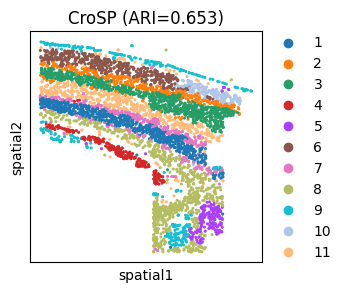

In [39]:
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.embedding(adata, basis="spatial", color='mclust', title=['CroSP (ARI=%.3f)'%ARI], s=20, show=False)#, legend_loc=False)
# plt.axis('off')
plt.savefig(os.path.join(output_dir, f'pred_domain.svg'), bbox_inches='tight', dpi=300)

/root/miniconda3/envs/deepst_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


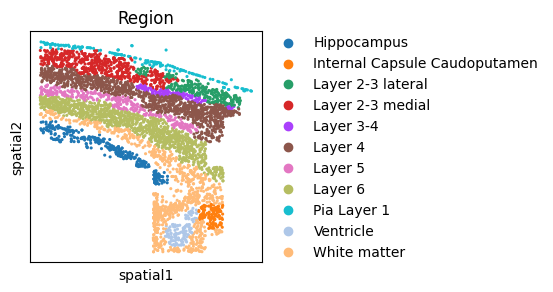

In [21]:
# layer annotation
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.embedding(adata, basis="spatial", color='Region', s=20, show=False)#, legend_loc=False)
# plt.axis('off')
plt.savefig(os.path.join(output_dir, f'true_domain.svg'), bbox_inches='tight', dpi=300)

/root/miniconda3/envs/deepst_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'mclust'}, xlabel='UMAP1', ylabel='UMAP2'>

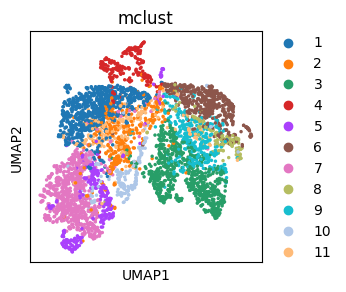

In [38]:
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.umap(adata, color='mclust', show=False)

/root/miniconda3/envs/deepst_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'Region'}, xlabel='UMAP1', ylabel='UMAP2'>

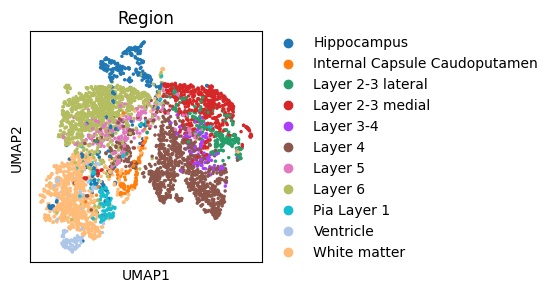

In [15]:
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.umap(adata, color='Region', show=False)